In [109]:
import numpy as np
from refnx.analysis import Objective, CurveFitter, Parameter, Transform
from refnx.analysis import process_chain
from refnx.reflect import Slab, SLD, ReflectModel
from refnx.dataset import ReflectDataset
%matplotlib inline

In [120]:
data = np.genfromtxt('Miro data.csv',delimiter=',',skip_header=64)
x = data[:,0]
y = data[:,1]
scale = y[0]

#Normalizing the counts
for i in range(0,len(y)):
    y[i] /= scale
    x[i] /= 2
data = np.zeros_like(data)
data[:,0] = np.radians(x)
data[:,1] = y
data = data.T

In [190]:
STO = SLD(4.81, name='STO')
LSMO = SLD(6.5, name='LSMO')
air = SLD(1, name='air')

In [191]:
LSMO_layer = LSMO(300, 5.8)
STO_LAYER = STO(0,0.26)
LSMO_layer.thick.setp(bounds=(200, 400), vary=True)
LSMO_layer.sld.real.setp(bounds=(5.0, 7.0), vary=True)
LSMO_layer.rough.setp(bounds=(1, 15), vary=True)

In [192]:
structure = STO_LAYER | LSMO | air

In [193]:
model = ReflectModel(structure, bkg=3e-6)

In [194]:
model.scale.setp(bounds=(0.1, 100.), vary=True)
model.bkg.setp(bounds=(1e-9, 9e-6), vary=True)

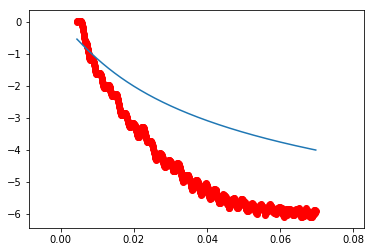

In [195]:
objective = Objective(model, data, transform=Transform('logY'))
fig, ax = objective.plot()

In [177]:
fitter = CurveFitter(objective)
fitter.fit('differential_evolution')

   covar: array([[  1.54596201e-04,  -4.11696901e-08,   7.72613680e+05],
       [ -4.11696901e-08,   2.75377165e-11,   2.30648673e+03],
       [  7.72613680e+05,   2.30648673e+03,   2.46693300e+20]])
     fun: 489.90059387217883
     jac: array([  2.69768832e+03,   6.35344802e+06,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1313
     nit: 28
  stderr: array([  1.24336721e-02,   5.24763913e-06,   1.57064732e+10])
 success: True
       x: array([  1.00000000e-01,   1.00000000e-09,   5.26659696e+00])

In [138]:
fitter.sample(1000)

100%|██████████| 1000/1000 [01:53<00:00,  9.76it/s]


[MCMCResult(name='scale', param=<Parameter:    'scale'    value=   0.101049     +/- 0.00141, bounds=[0.1, 100.0]>, stderr=0.0014092538205246405, chain=array([[ 0.10414658,  0.1037507 ,  0.1042513 , ...,  0.10046807,
         0.10646297,  0.10070016],
       [ 0.10414658,  0.1037507 ,  0.1042513 , ...,  0.10053189,
         0.10646297,  0.10070016],
       [ 0.10414658,  0.10332394,  0.1042513 , ...,  0.10056996,
         0.10606725,  0.10070016],
       ..., 
       [ 0.10319938,  0.10089787,  0.1003595 , ...,  0.10062719,
         0.10000534,  0.10026652],
       [ 0.10319938,  0.10015242,  0.1003595 , ...,  0.10062719,
         0.10000534,  0.10026652],
       [ 0.10319938,  0.10015242,  0.1003595 , ...,  0.10062719,
         0.10000534,  0.1002604 ]]), median=0.10104905357268927),
 MCMCResult(name='bkg', param=<Parameter:     'bkg'     value=  5.10534e-08   +/- 6.79e-08, bounds=[1e-09, 9e-06]>, stderr=6.7913624469138933e-08, chain=array([[  9.66730901e-07,   3.52234897e-06,   4.6048

In [139]:
process_chain(objective, fitter.chain, nburn=400, nthin=50)


[MCMCResult(name='scale', param=<Parameter:    'scale'    value=   0.100906     +/- 0.00113, bounds=[0.1, 100.0]>, stderr=0.0011284382699042333, chain=array([[ 0.10044622,  0.1017956 ,  0.10247425, ...,  0.10393074,
         0.10502554,  0.10186016],
       [ 0.10102204,  0.10251813,  0.10106292, ...,  0.10210995,
         0.10148212,  0.10172034],
       [ 0.10217044,  0.1001299 ,  0.10083708, ...,  0.10231277,
         0.10233714,  0.10119388],
       ..., 
       [ 0.10050776,  0.10133518,  0.10262722, ...,  0.10003907,
         0.10207215,  0.1002299 ],
       [ 0.10043112,  0.10058465,  0.102066  , ...,  0.10106267,
         0.10010168,  0.10063825],
       [ 0.10002529,  0.10022702,  0.1049883 , ...,  0.10246451,
         0.10043942,  0.1015011 ]]), median=0.10090635040751744),
 MCMCResult(name='bkg', param=<Parameter:     'bkg'     value=  4.48526e-08   +/- 5.25e-08, bounds=[1e-09, 9e-06]>, stderr=5.2456320263710268e-08, chain=array([[  4.21070006e-08,   2.16044353e-08,   1.9823

________________________________________________________________________________
Objective - 4530863760
Dataset = <refnx.dataset.data1d.Data1D object at 0x10e0f75d0>
datapoints = 749
chi2 = 165.617423063
Weighted = False
Transform = <refnx.analysis.objective.Transform object at 0x106e66f90>
________________________________________________________________________________
Parameters:       ''       
________________________________________________________________________________
Parameters: 'instrument parameters'
<Parameter:    'scale'    value=   0.100906     +/- 0.00113, bounds=[0.1, 100.0]>
<Parameter:     'bkg'     value=  4.48526e-08   +/- 5.25e-08, bounds=[1e-09, 9e-06]>
<Parameter:'dq - resolution'value=       5        (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters: 'Structure - ' 
________________________________________________________________________________
Parameters:      'STO'     
<Parameter: 'STO

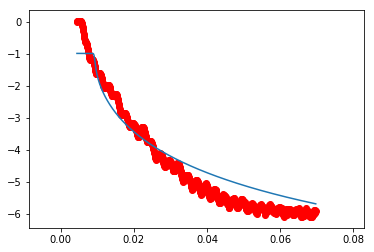

In [141]:
print(objective)
fig, ax = objective.plot()